In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
import researchpy

# Gender fifa and probabilities dataframe

In [5]:
df = pd.read_csv('gender-fifa-probabilities.csv')
del df['Country Name_y']

Testing values

In [542]:
df[((df['Country Name_x'] == 'Norway') | (df['Country Name_x'] == 'Argentina')) & (df['Year'] == 2010)]


df[(df['Country Name_x'] == 'Norway') & (df['Gender'] == 'F')]['Index'].mean()

0.8345181818181818

In [547]:
df[(df['Country Name_x'] == 'Norway') & (df['Gender'] == 'F')]['fifa_rank'].mean()
# df[(df['Country Name_x'] == 'Norway')].head()

9.363636363636363

## Splited df in male and female

In [8]:
female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']

In [9]:
female.describe()

,Year,Index,gender_rank,fifa_rank,Total Points PTS,Previous Points Prev.Pts,+/-,p
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,2012.309326,0.694751,62.557710,60.601108,1451.397045,1450.207756,-2.715605,0.077695
std,3.359454,0.060353,38.738007,38.211636,334.102980,339.309109,16.605079,0.181470
min,2007.000000,0.000000,0.000000,1.000000,358.000000,0.000000,-134.000000,0.000000
25%,2010.000000,0.663550,29.000000,27.000000,1216.500000,1216.500000,-1.000000,0.000000
50%,2012.000000,0.694500,61.000000,58.000000,1408.000000,1405.000000,0.000000,0.000000
75%,2015.000000,0.726300,93.000000,91.000000,1680.000000,1678.500000,1.000000,0.000000
max,2018.000000,0.881000,144.000000,152.000000,2228.000000,2229.000000,14.000000,0.800000


In [10]:
female_80 = female[female['fifa_rank']<81]
female_80.describe()

,Year,Index,gender_rank,fifa_rank,Total Points PTS,Previous Points Prev.Pts,+/-,p
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,2012.155862,0.703833,56.550345,38.264828,1628.176552,1626.474483,-0.784828,0.115544
std,3.333943,0.057930,38.411148,23.131953,245.759915,253.581590,7.781231,0.211381
min,2007.000000,0.567600,1.000000,1.000000,1242.000000,0.000000,-80.000000,0.000000
25%,2009.000000,0.674000,22.000000,18.000000,1405.000000,1403.000000,-1.000000,0.000000
50%,2012.000000,0.701000,52.000000,36.000000,1596.000000,1592.000000,0.000000,0.000000
75%,2015.000000,0.737000,84.000000,58.000000,1828.000000,1830.000000,1.000000,0.153846
max,2018.000000,0.881000,142.000000,80.000000,2228.000000,2229.000000,14.000000,0.800000


# Confidence interval

In [11]:
from scipy.stats import t

#### Index mean

In [12]:
sample = female['Index']

confidence_level = 0.95
degrees_freedom = sample.size - 1
sample_mean = np.mean(sample)
sample_standard_error = stats.sem(sample)

index_confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

index_confidence_interval

(0.6911520405859722, 0.6983489751111654)

#### Fifa rank mean

In [13]:
sample = female['fifa_rank']

confidence_level = 0.95
degrees_freedom = sample.size - 1
sample_mean = np.mean(sample)
sample_standard_error = stats.sem(sample)

fifa_confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
fifa_confidence_interval

(58.32278358720399, 62.879432479278)

#### Correlation or rvalue

In [14]:
# It is declared in the code below
# correlation_df 

In [60]:
sample =correlation_df['Men Correlation']

confidence_level = 0.95
degrees_freedom = sample.size - 1
sample_mean = np.mean(sample)
sample_standard_error = stats.sem(sample)

fifa_confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
fifa_confidence_interval

(-0.2604919324832487, -0.15428976631316954)

In [61]:
# QUES - What does this mean?
student = stats.t.cdf(df=degrees_freedom, x =confidence_level,loc = sample_mean, scale = sample_standard_error)
student

0.9999999999998347

#### Sorted by gender Rank

In [63]:
sorted_df = df.sort_values(["Year", "gender_rank"], ascending = (True, True))
'''
Can gender gap explain something when differences are big (fifa_rank women - fifa_rank men )
I should get the median of index to check if the big differences are under or above the median
'''
sorted_df.head(10)

,Country ISO3,Country Name_x,Year,Index,gender_rank,Gender,fifa_rank,Total Points PTS,Previous Points Prev.Pts,+/-,p
2235,SWE,Sweden,2007,0.8146,1.0,F,3,2086,2070.0,1,0.575000
2236,SWE,Sweden,2007,0.8146,1.0,M,24,853,853.0,0,0.347826
1822,NOR,Norway,2007,0.8059,2.0,F,5,2040,2035.0,0,0.600000
1823,NOR,Norway,2007,0.8059,2.0,M,29,827,827.0,-1,0.250000
801,FIN,Finland,2007,0.8044,3.0,F,16,1877,1877.0,0,0.000000
802,FIN,Finland,2007,0.8044,3.0,M,36,697,695.0,0,0.000000
1133,ISL,Iceland,2007,0.7836,4.0,F,21,1793,1793.0,0,0.000000
1134,ISL,Iceland,2007,0.7836,4.0,M,90,380,380.0,-1,0.000000
1863,NZL,New Zealand,2007,0.7649,5.0,F,23,1720,1720.0,0,0.000000
1864,NZL,New Zealand,2007,0.7649,5.0,M,95,349,349.0,0,0.000000


#### Sorted by gender & fifa rank

In [64]:
df.sort_values(["Year", "Gender" ,"fifa_rank"], ascending = (True, True,True)).head(10)

,Country ISO3,Country Name_x,Year,Index,gender_rank,Gender,fifa_rank,Total Points PTS,Previous Points Prev.Pts,+/-,p
613,GER,Germany,2007,0.7618,7.0,F,1,2201,2201.0,0,0.681818
2459,USA,United States,2007,0.7002,31.0,F,2,2186,2192.0,0,0.800000
2235,SWE,Sweden,2007,0.8146,1.0,F,3,2086,2070.0,1,0.575000
315,BRA,Brazil,2007,0.6637,74.0,F,4,2082,2082.0,-1,0.588235
1822,NOR,Norway,2007,0.8059,2.0,F,5,2040,2035.0,0,0.600000
836,FRA,France,2007,0.6824,51.0,F,7,2003,1993.0,0,0.526316
635,DEN,Denmark,2007,0.7519,8.0,F,8,1960,1973.0,0,0.214286
386,CAN,Canada,2007,0.7198,18.0,F,9,1950,1950.0,0,0.296296
858,ENG,United Kingdom,2007,0.7441,11.0,F,10,1946,1944.0,0,0.000000
1237,JPN,Japan,2007,0.6455,91.0,F,11,1943,1943.0,0,0.424242


#### Female Countries analysis by index

In [267]:
index= 0.76
female_2018 = female[female['Year'] ==2018]
female_high_index = female_2018[female_2018['Index']>index]
female_low_index = female_2018[female_2018['Index']<=index]

print(len(female_high_index[female_high_index['fifa_rank']<=15].sort_values('fifa_rank')))
print(len(female_high_index[female_high_index['fifa_rank']>15].sort_values('fifa_rank')))


# female_low_index[female_low_index['fifa_rank']<=15].sort_values('fifa_rank')
# female_low_index[female_low_index['fifa_rank']>15].sort_values('fifa_rank')



6
10


#### Countries that appear in men top 10 in history

In [65]:
top_10_men = male[(male['fifa_rank'] < 11)]
top_10_men.sort_values(['Year','fifa_rank'])

,Country ISO3,Country Name_x,Year,Index,gender_rank,Gender,fifa_rank,Total Points PTS,Previous Points Prev.Pts,+/-,p
45,ARG,Argentina,2007,0.6982,33.0,M,1,1523,1523.0,0,0.543210
316,BRA,Brazil,2007,0.6637,74.0,M,2,1502,1502.0,0,0.657407
1178,ITA,Italy,2007,0.6498,84.0,M,3,1498,1498.0,0,0.542169
737,ESP,Spain,2007,0.7444,10.0,M,4,1349,1349.0,0,0.491525
614,GER,Germany,2007,0.7618,7.0,M,5,1298,1296.0,0,0.691489
...,...,...,...,...,...,...,...,...,...,...,...
2010,POR,Portugal,2018,0.7320,37.0,M,6,1614,1614.0,0,0.500000
2458,URU,Uruguay,2018,0.7150,56.0,M,7,1609,1609.0,0,0.384615
429,SUI,Switzerland,2018,0.7550,20.0,M,8,1599,1599.0,0,0.323529
757,ESP,Spain,2018,0.7460,29.0,M,9,1591,1591.0,0,0.491525


In [512]:
def filter_women_by_men(female_df,men_df,year,rank):
    men_top =  set(men_df[(men_df['Year']== year) & (men_df["fifa_rank"] < rank )]['Country Name_x'])
    men_bottom = set(men_df[(men_df['Year']== year) & (men_df["fifa_rank"] >= rank )]['Country Name_x'])
    
    female_by_male_top = female_df[(female_df['Country Name_x'].isin(men_top))& (female_df['Year'] == year)]
    female_by_male_bottom = female_df[(female_df['Country Name_x'].isin(men_bottom))& (female_df['Year'] == year)]
    
    female_top_men_top = set(female_by_male_top[female_by_male_top['fifa_rank'] < rank]['Country Name_x'])
    female_top_men_bottom = set(female_by_male_bottom[female_by_male_bottom['fifa_rank'] < rank]['Country Name_x'])
    female_bottom_men_top = set(female_by_male_top[female_by_male_top['fifa_rank'] >= rank]['Country Name_x'])
    female_bottom_men_bottom = set(female_by_male_bottom[female_by_male_bottom['fifa_rank'] >= rank]['Country Name_x'])
    
    
    return {
        'men_top':[men_top,len(men_top)],
        'men_bottom':[men_bottom,len(men_bottom)],
        'women_top_men_top':[female_top_men_top,len(female_top_men_top)], 
        'women_bottom_men_top':[female_bottom_men_top,len(female_bottom_men_top)],
        'women_top_men_bottom':[female_top_men_bottom,len(female_top_men_bottom)],
        'women_bottom_men_bottom':[female_bottom_men_bottom,len(female_bottom_men_bottom)]}
        

## Avg indexes for women by men rankings

In [537]:
women_top_men_top = filter_women_by_men(female,male,2018,16)['women_top_men_top'][0]
women_top_men_top

female[female['Country Name_x'].isin(women_top_men_top)]['Index'].mean()


0.7438757575757575

In [540]:
female[female['Country Name_x'].isin(['France', 'Netherlands', 'Spain', 'Sweden', 'United Kingdom'])]['Index'].mean()




0.7567563636363637

#### Female 2018 filtered by 2018 men top 15

In [221]:

men_15_2018 = male[(male['Year']== 2018) & (male["fifa_rank"] < 16 )]
men_not_15_2018 = male[(male['Year']== 2018) & (male["fifa_rank"] >= 16 )]

# Female from male top 15
female_by_male_top_15_2018 = female[(female['Country Name_x'].isin(set(men_15_2018['Country Name_x'])))& (female['Year'] == 2018)].sort_values('fifa_rank')
female_by_male_top_15_2018[['Country Name_x','Index','gender_rank','fifa_rank']]

# Female from male > top 15
female_by_male_not_top_15_2018 = female[(female['Country Name_x'].isin(set(men_not_15_2018['Country Name_x'])))& (female['Year'] == 2018)]

# Countries in female top 15 from men top 15
female_by_male_top_15_2018[female_by_male_top_15_2018['fifa_rank']<16].describe()

# Countries in female > top 15 from men top 15
female_by_male_top_15_2018[female_by_male_top_15_2018['fifa_rank']>=16]

# countries in female top 15 from men > top 15
female_by_male_not_top_15_2018[female_by_male_not_top_15_2018['fifa_rank']<16].describe()


# countries in female > top 15 from men > top 15
female_by_male_not_top_15_2018[female_by_male_not_top_15_2018['fifa_rank']>=16]



,Country ISO3,Country Name_x,Year,Index,gender_rank,Gender,fifa_rank,Total Points PTS,Previous Points Prev.Pts,+/-,p
28,ALB,Albania,2018,0.734,34.0,F,78,1325,1328.0,-2,0.0
42,UAE,United Arab Emirates,2018,0.642,121.0,F,92,1230,1230.0,-1,0.0
124,AUT,Austria,2018,0.718,53.0,F,23,1797,1802.0,-2,0.0
141,AZE,Azerbaijan,2018,0.680,97.0,F,69,1360,1360.0,1,0.0
195,BFA,Burkina Faso,2018,0.629,129.0,F,120,1062,1062.0,-6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2437,UKR,Ukraine,2018,0.708,65.0,F,24,1728,1729.0,1,0.0
2503,VEN,"Venezuela, RB",2018,0.709,64.0,F,57,1421,1421.0,-3,0.0
2525,VIE,Vietnam,2018,0.698,77.0,F,35,1638,1638.0,1,0.0
2558,RSA,South Africa,2018,0.755,19.0,F,48,1480,1446.0,2,0.0


#### Female 2018 top 15

In [67]:
female[(female['fifa_rank'] < 16) &( female['Year'] == 2018)].sort_values('fifa_rank')[['Country Name_x','Index','gender_rank','fifa_rank']]

,Country Name_x,Index,gender_rank,fifa_rank
2479,United States,0.720,51.0,1
633,Germany,0.776,14.0,2
856,France,0.779,12.0,3
878,United Kingdom,0.774,15.0,4
406,Canada,0.771,16.0,5
102,Australia,0.730,39.0,6
1820,Netherlands,0.747,27.0,7
1257,Japan,0.662,110.0,8
2255,Sweden,0.822,3.0,9
335,Brazil,0.681,95.0,10


## CORRELATION  &  LINAR REGRESSION 


In [68]:
def corr_plot(corr_df,title=''):
    # To slice half 
    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = True

    # Diverging color pallet to visualize strong negative and possitive correlations
    cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)
    
    #Title
    ax = plt.axes()
    ax.set_title(title)
    
    return sns.heatmap(corr_df,annot=True, mask=mask,cmap=cmap,ax = ax)

#### Correlation by top x in fifa rank
It returns the pearson correlation between fifa_rank and index

In [69]:
new_df = female[(female['fifa_rank'] <= 81)].sort_values('fifa_rank')
# Correlations
corr_pearson_rvalue,corr_pearson_pvalue = stats.pearsonr(new_df['Index'],new_df['fifa_rank'])
print(corr_pearson_rvalue,corr_pearson_pvalue)

-0.46351162601040446 3.6870574074858755e-40


#### Confidence interval for correlation


In [116]:
# QUES- What does this mean?
sample = correlation_df['Woman Correlation']

confidence_level = 0.95
degrees_freedom = sample.size - 1
sample_mean = np.mean(sample)
sample_standard_error = stats.sem(sample)

fifa_confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
fifa_confidence_interval

(-0.5078194490270973, -0.44116275735198485)

#### Correlation by year and top x in fifa rank
It returns the pearson correlation between fifa_rank and index

In [70]:
def correlation(df,year,rank,title):
    # Slice dataframe
    new_df = df[(df["Year"] == year) & (df['fifa_rank'] <= rank)].sort_values('fifa_rank')
    # Correlations
    corr_pearson = new_df.corr()
    corr_spearman = new_df.corr(method = 'spearman')
    
    corr_plot(corr_pearson,"Pearson Correlation "+title)
    plt.show()


#     corr_plot(corr_spearman,"Spearman Correlation "+title)
#     plt.show()
    return corr_pearson['fifa_rank'].Index
 

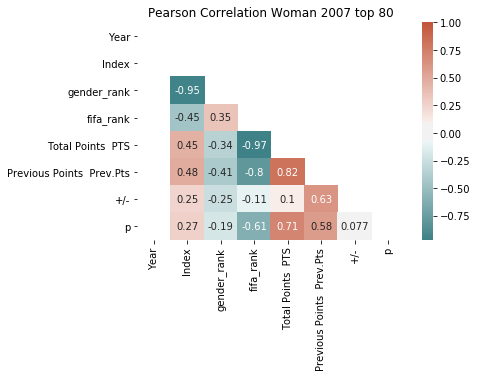

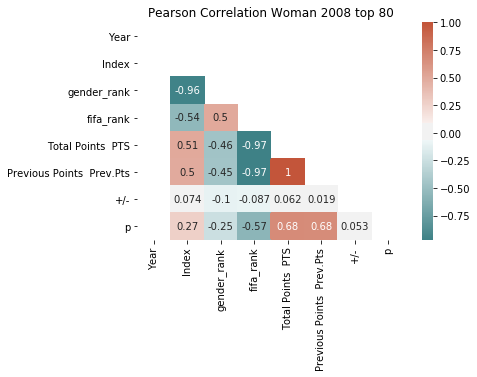

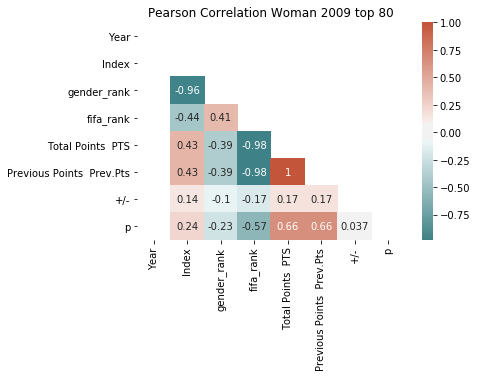

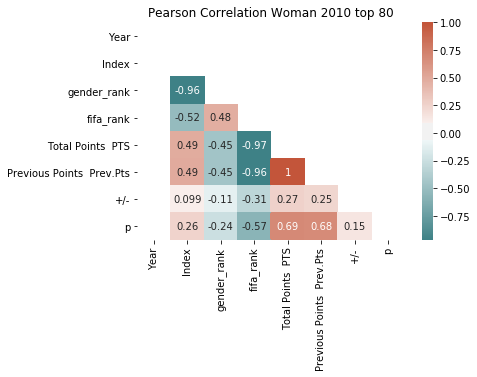

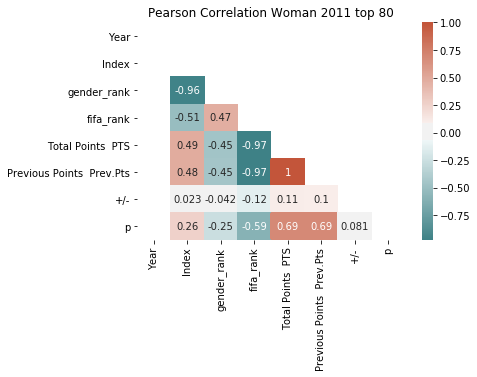

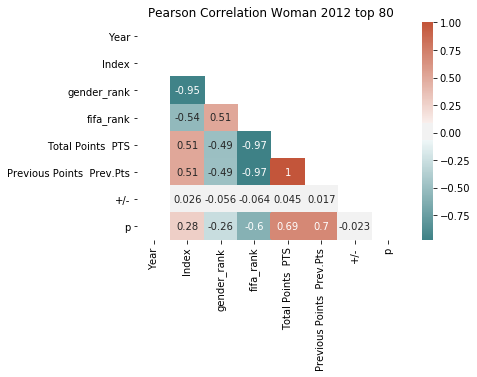

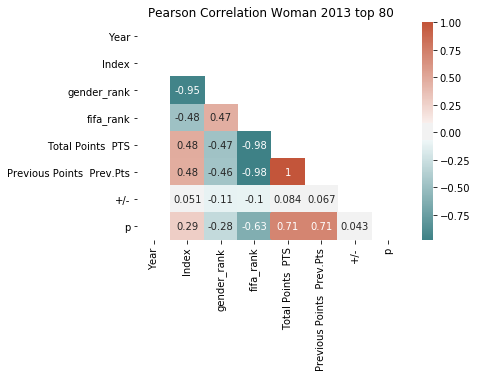

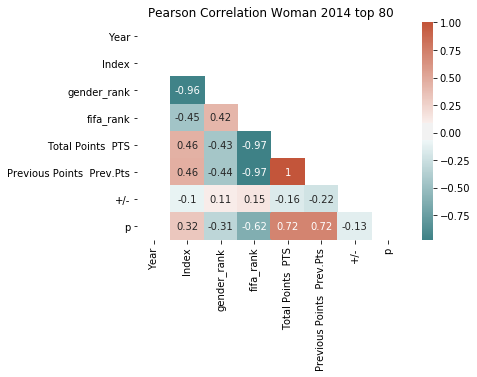

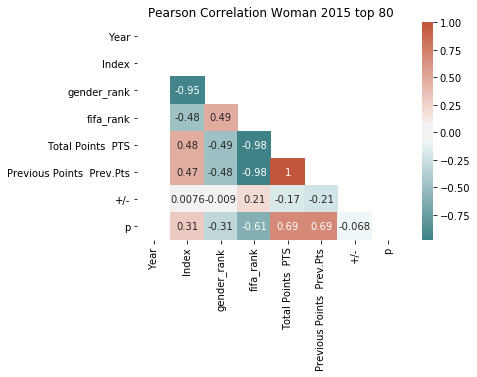

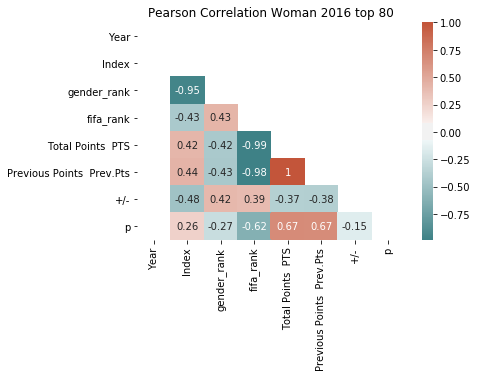

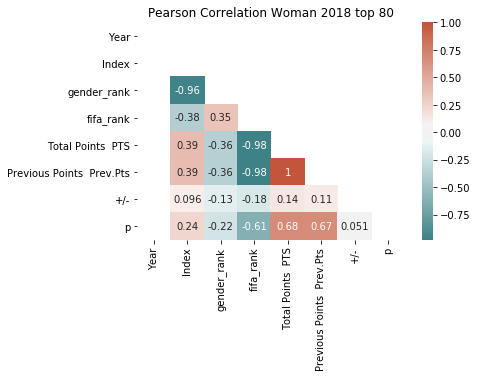

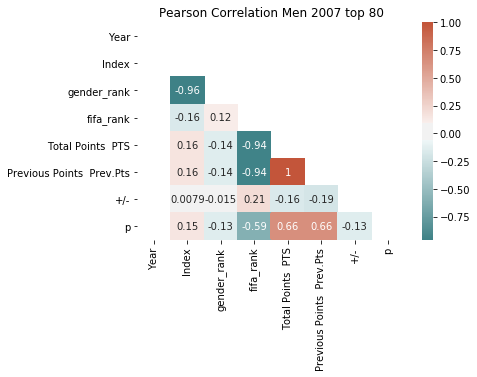

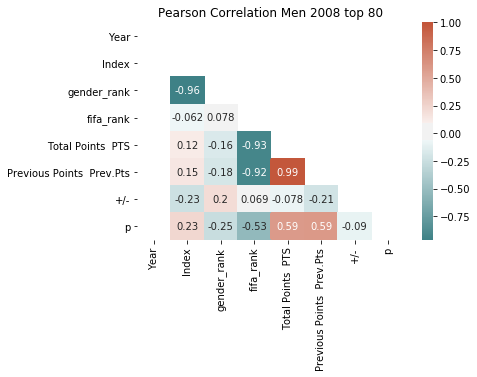

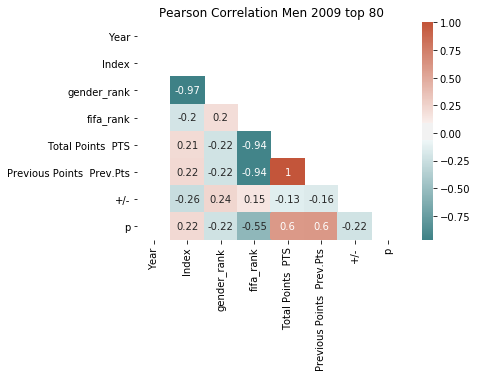

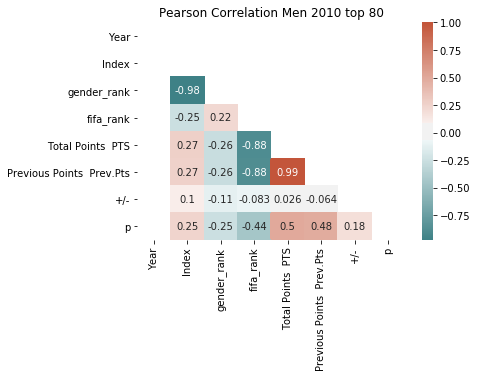

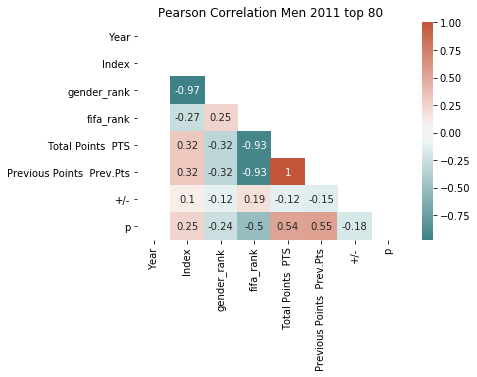

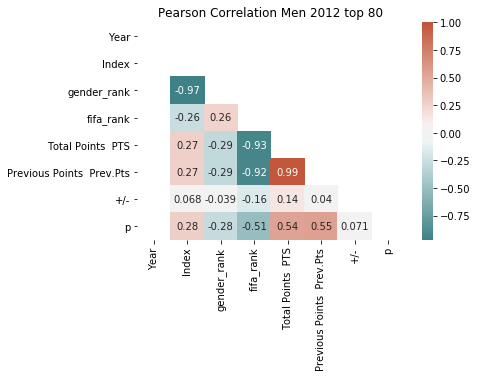

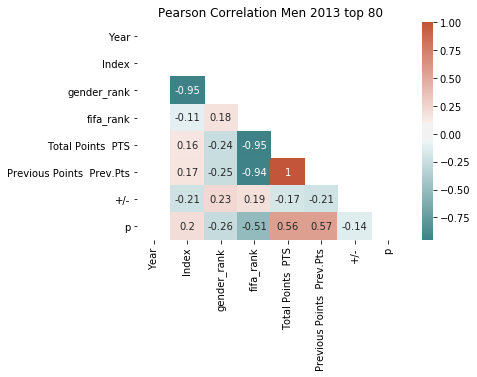

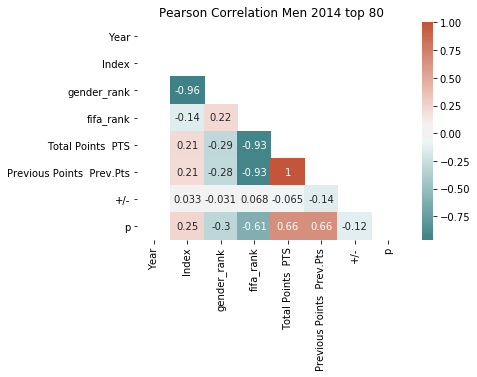

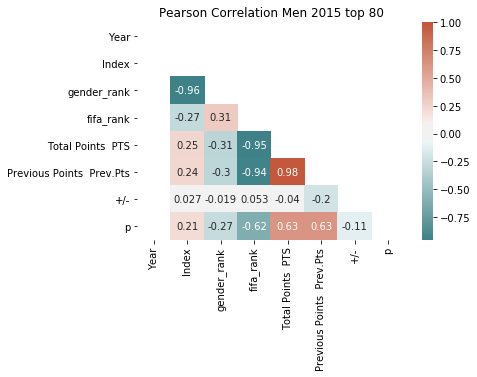

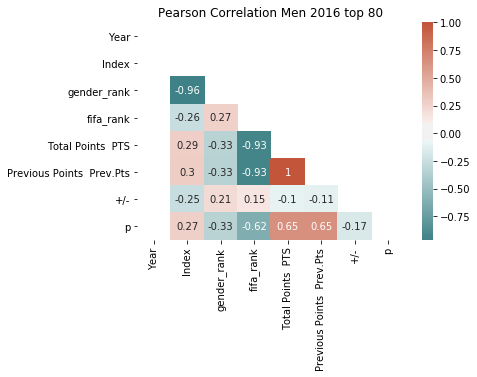

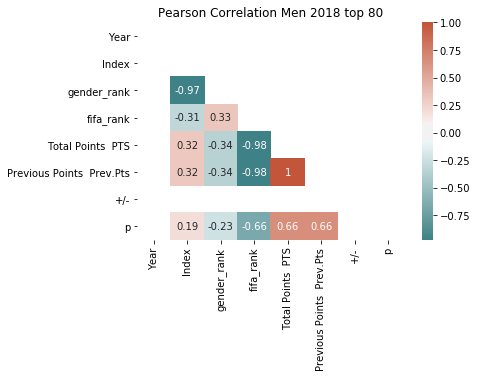

In [294]:
f_80_2007 = correlation(female,2007,80, 'Woman 2007 top 80')
f_80_2008 = correlation(female,2008,80, 'Woman 2008 top 80')
f_80_2009 = correlation(female,2009,80, 'Woman 2009 top 80')
f_80_2010 = correlation(female,2010,80, 'Woman 2010 top 80')
f_80_2011 = correlation(female,2011,80, 'Woman 2011 top 80')
f_80_2012 = correlation(female,2012,80, 'Woman 2012 top 80')
f_80_2013 = correlation(female,2013,80, 'Woman 2013 top 80')
f_80_2014 = correlation(female,2014,80, 'Woman 2014 top 80')
f_80_2015 = correlation(female,2015,80, 'Woman 2015 top 80')
f_80_2016 = correlation(female,2016,80, 'Woman 2016 top 80')
f_80_2018 = correlation(female,2018,80, 'Woman 2018 top 80')

m_80_2007 = correlation(male,2007,80, 'Men 2007 top 80')
m_80_2008 = correlation(male,2008,80, 'Men 2008 top 80')
m_80_2009 = correlation(male,2009,80, 'Men 2009 top 80')
m_80_2010 = correlation(male,2010,80, 'Men 2010 top 80')
m_80_2011 = correlation(male,2011,80, 'Men 2011 top 80')
m_80_2012 = correlation(male,2012,80, 'Men 2012 top 80')
m_80_2013 = correlation(male,2013,80, 'Men 2013 top 80')
m_80_2014 = correlation(male,2014,80, 'Men 2014 top 80')
m_80_2015 = correlation(male,2015,80, 'Men 2015 top 80')
m_80_2016 = correlation(male,2016,80, 'Men 2016 top 80')
m_80_2018 = correlation(male,2018,80, 'Men 2018 top 80')

In [289]:
def correlation_filtered(df,year,title):
    # Slice dataframe
    new_df = df[(df["Year"] == year) ].sort_values('fifa_rank')
    # Correlations
    corr_pearson = new_df.corr()
    corr_spearman = new_df.corr(method = 'spearman')
    
    corr_plot(corr_pearson,"Pearson Correlation "+title)
    plt.show()


#     corr_plot(corr_spearman,"Spearman Correlation "+title)
#     plt.show()
    return corr_pearson['fifa_rank'].Index
 

#### WOMEN MEN  TOP 80 Correlation dataframe

In [72]:
data = {
    'Year': list(set(df['Year'])), 
    'Woman Correlation': [f_80_2007,f_80_2008,f_80_2009,f_80_2010,f_80_2011,f_80_2012,f_80_2013,f_80_2014,f_80_2015,f_80_2016,f_80_2018],
    'Men Correlation': [m_80_2007,m_80_2008,m_80_2009,m_80_2010,m_80_2011,m_80_2012,m_80_2013,m_80_2014,m_80_2015,m_80_2016,m_80_2018]
}

correlation_df = pd.DataFrame(data,columns = ['Year','Woman Correlation','Men Correlation']).sort_values('Year')
correlation_df


,Year,Woman Correlation,Men Correlation
2,2007,-0.444570,-0.204978
3,2008,-0.520634,-0.247304
4,2009,-0.505872,-0.268885
5,2010,-0.535747,-0.258073
6,2011,-0.479295,-0.109853
7,2012,-0.451387,-0.137101
8,2013,-0.481590,-0.268473
9,2014,-0.426026,-0.256491
10,2015,-0.379533,-0.309367
0,2016,-0.453616,-0.158928


## Compare female top 80 to female above 80 correlations

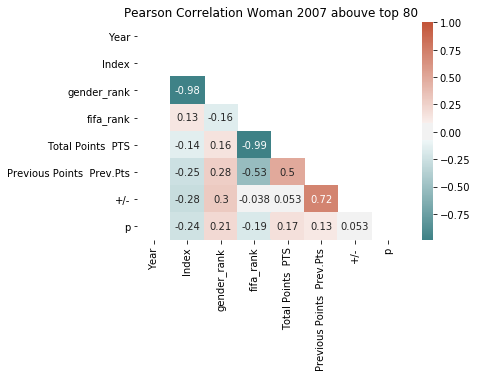

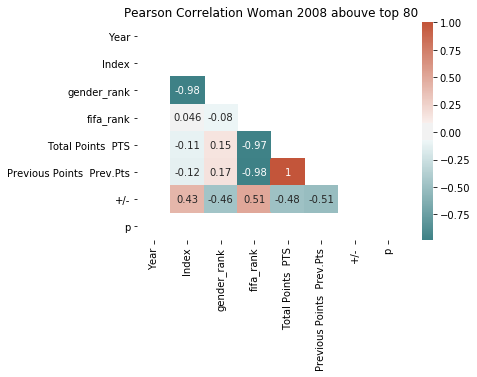

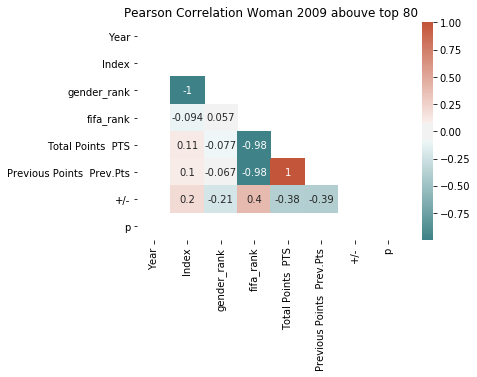

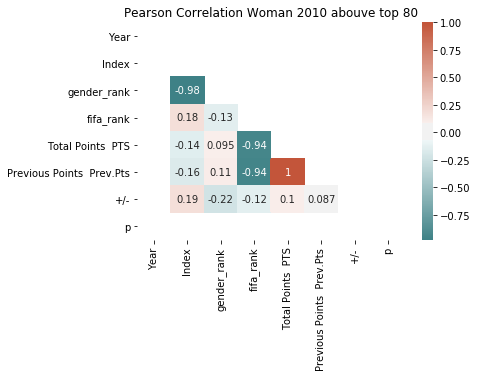

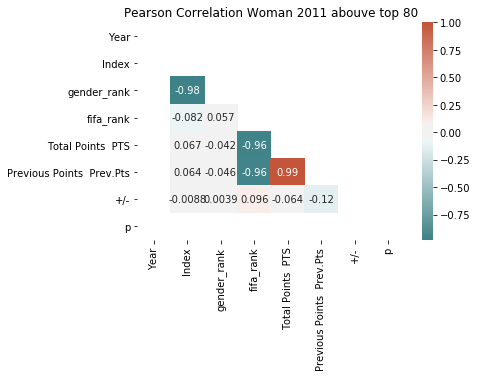

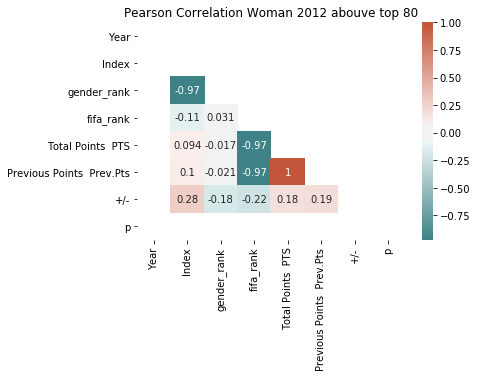

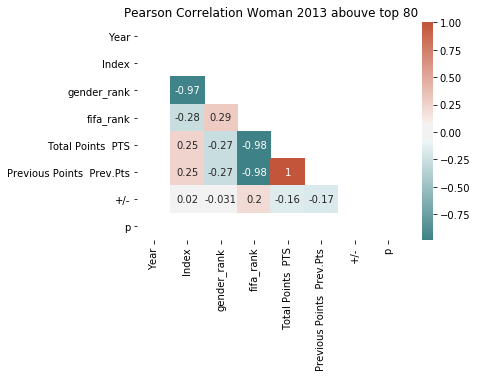

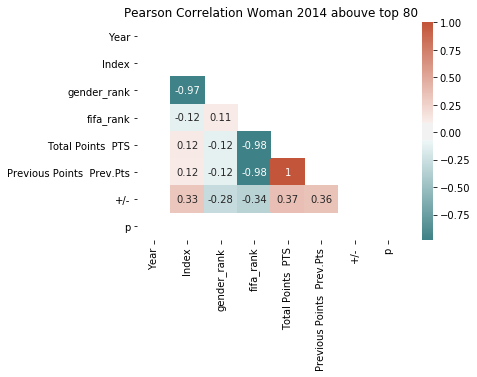

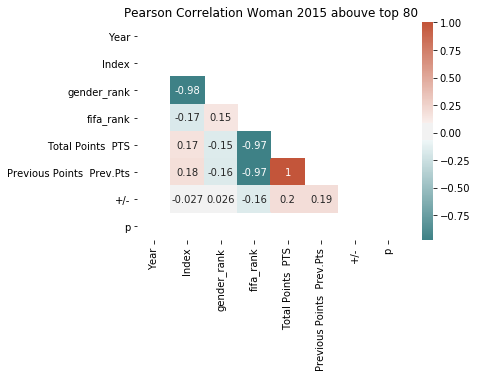

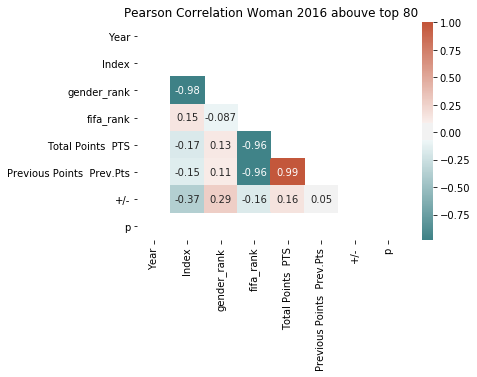

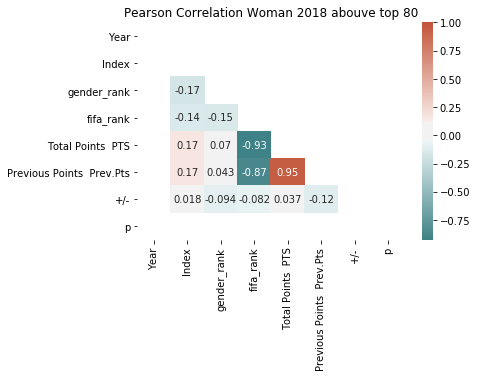

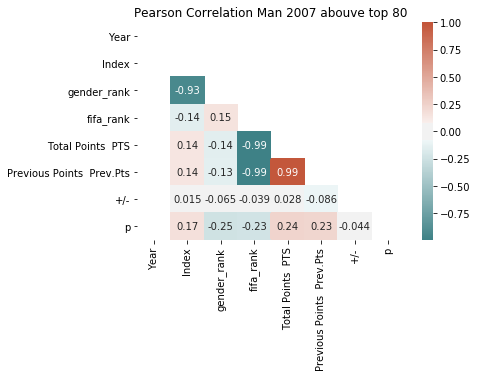

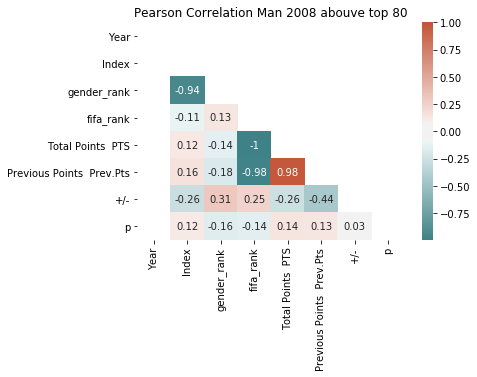

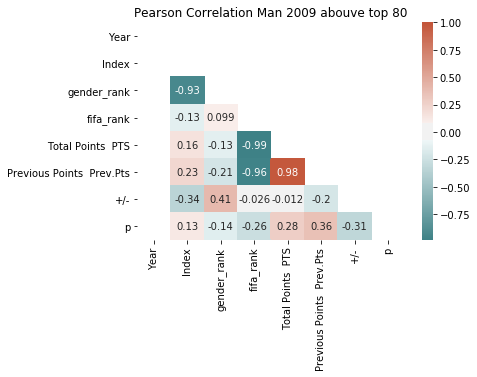

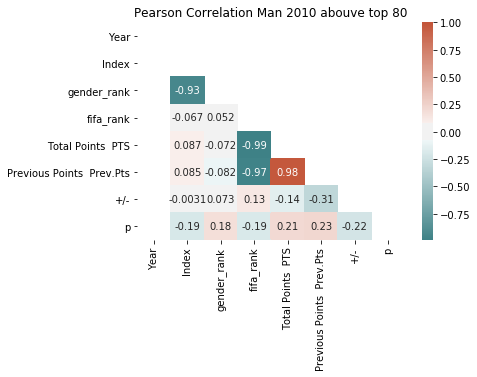

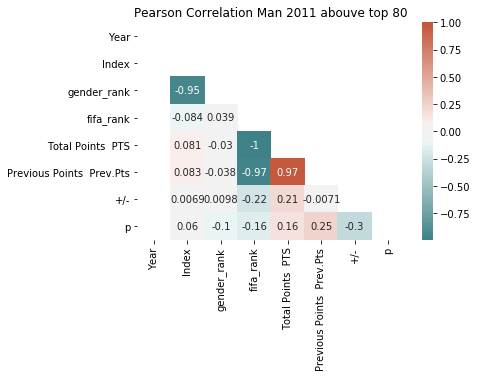

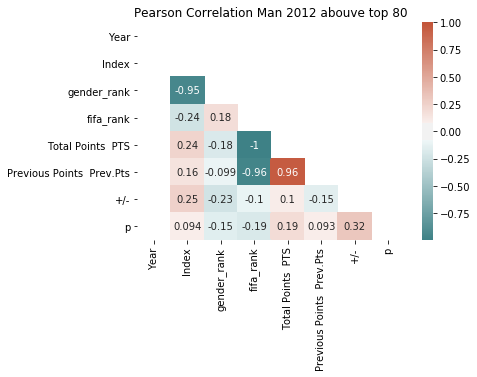

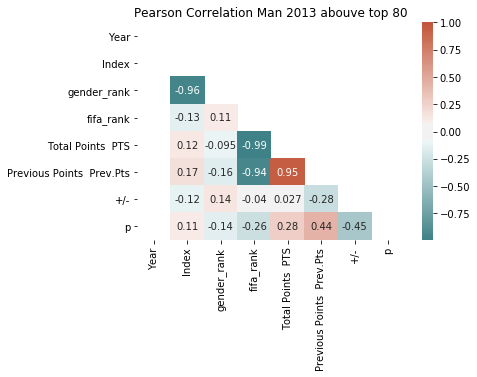

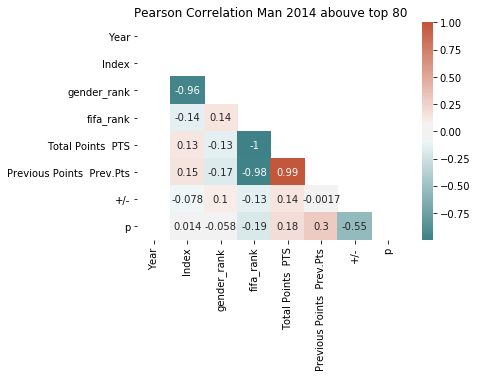

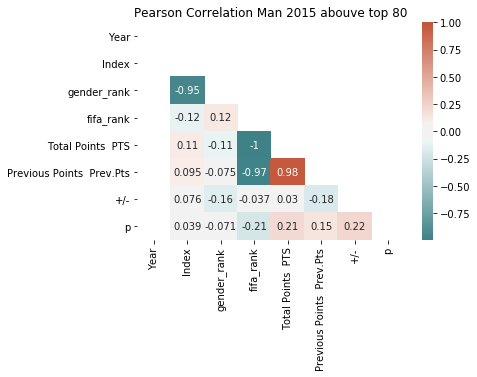

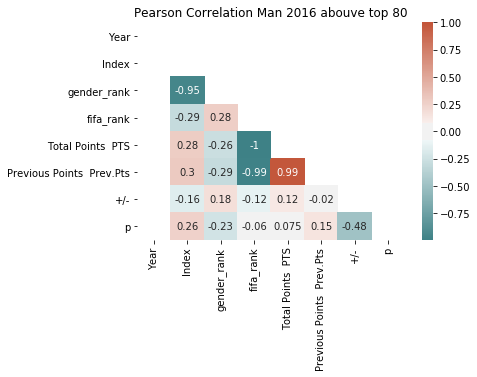

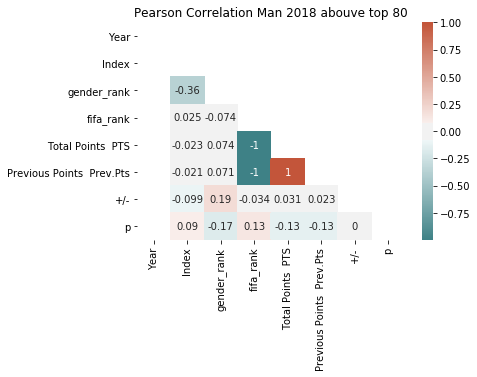

In [320]:
f_above_80_2007 = correlation_filtered(female[female['fifa_rank'] >= 80],2007, 'Woman 2007 abouve top 80')
f_above_80_2008 = correlation_filtered(female[female['fifa_rank'] >= 80],2008, 'Woman 2008 abouve top 80')
f_above_80_2009 = correlation_filtered(female[female['fifa_rank'] >= 80],2009, 'Woman 2009 abouve top 80')
f_above_80_2010 = correlation_filtered(female[female['fifa_rank'] >= 80],2010, 'Woman 2010 abouve top 80')
f_above_80_2011 = correlation_filtered(female[female['fifa_rank'] >= 80],2011, 'Woman 2011 abouve top 80')
f_above_80_2012 = correlation_filtered(female[female['fifa_rank'] >= 80],2012, 'Woman 2012 abouve top 80')
f_above_80_2013 = correlation_filtered(female[female['fifa_rank'] >= 80],2013, 'Woman 2013 abouve top 80')
f_above_80_2014 = correlation_filtered(female[female['fifa_rank'] >= 80],2014, 'Woman 2014 abouve top 80')
f_above_80_2015 = correlation_filtered(female[female['fifa_rank'] >= 80],2015, 'Woman 2015 abouve top 80')
f_above_80_2016 = correlation_filtered(female[female['fifa_rank'] >= 80],2016, 'Woman 2016 abouve top 80')
f_above_80_2018 = correlation_filtered(female[female['fifa_rank'] >= 80],2018, 'Woman 2018 abouve top 80')

m_above_80_2007 = correlation_filtered(male[male['fifa_rank'] >= 80],2007, 'Man 2007 abouve top 80')
m_above_80_2008 = correlation_filtered(male[male['fifa_rank'] >= 80],2008, 'Man 2008 abouve top 80')
m_above_80_2009 = correlation_filtered(male[male['fifa_rank'] >= 80],2009, 'Man 2009 abouve top 80')
m_above_80_2010 = correlation_filtered(male[male['fifa_rank'] >= 80],2010, 'Man 2010 abouve top 80')
m_above_80_2011 = correlation_filtered(male[male['fifa_rank'] >= 80],2011, 'Man 2011 abouve top 80')
m_above_80_2012 = correlation_filtered(male[male['fifa_rank'] >= 80],2012, 'Man 2012 abouve top 80')
m_above_80_2013 = correlation_filtered(male[male['fifa_rank'] >= 80],2013, 'Man 2013 abouve top 80')
m_above_80_2014 = correlation_filtered(male[male['fifa_rank'] >= 80],2014, 'Man 2014 abouve top 80')
m_above_80_2015 = correlation_filtered(male[male['fifa_rank'] >= 80],2015, 'Man 2015 abouve top 80')
m_above_80_2016 = correlation_filtered(male[male['fifa_rank'] >= 80],2016, 'Man 2016 abouve top 80')
m_above_80_2018 = correlation_filtered(male[male['fifa_rank'] >= 80],2018, 'Man 2018 abouve top 80')


In [322]:
data = {
    'Year': list(set(df['Year'])), 
    'Woman Correlation': [f_80_2007,f_80_2008,f_80_2009,f_80_2010,f_80_2011,f_80_2012,f_80_2013,f_80_2014,f_80_2015,f_80_2016,f_80_2018],
    'Men Correlation': [m_80_2007,m_80_2008,m_80_2009,m_80_2010,m_80_2011,m_80_2012,m_80_2013,m_80_2014,m_80_2015,m_80_2016,m_80_2018],
    'Woman above 80': [f_above_80_2007,f_above_80_2008,f_above_80_2009,f_above_80_2010,f_above_80_2011,f_above_80_2012,f_above_80_2013,f_above_80_2014,f_above_80_2015,f_above_80_2016,f_above_80_2018],
    'Men above 80': [m_above_80_2007,m_above_80_2008,m_above_80_2009,m_above_80_2010,m_above_80_2011,m_above_80_2012,m_above_80_2013,m_above_80_2014,m_above_80_2015,m_above_80_2016,m_above_80_2018]
    
}

correlation_df = pd.DataFrame(data,columns = ['Year','Woman Correlation','Men Correlation', 'Woman above 80','Men above 80']).sort_values('Year')
correlation_df

,Year,Woman Correlation,Men Correlation,Woman above 80,Men above 80
2,2007,-0.444570,-0.204978,-0.094409,-0.126071
3,2008,-0.520634,-0.247304,0.182068,-0.067207
4,2009,-0.505872,-0.268885,-0.081517,-0.083790
5,2010,-0.535747,-0.258073,-0.111150,-0.237401
6,2011,-0.479295,-0.109853,-0.279015,-0.133014
7,2012,-0.451387,-0.137101,-0.115281,-0.138103
8,2013,-0.481590,-0.268473,-0.165723,-0.118530
9,2014,-0.426026,-0.256491,0.145985,-0.287395
10,2015,-0.379533,-0.309367,-0.139159,0.025003
0,2016,-0.520634,-0.158928,0.132968,-0.142408


### Save correlation df

In [325]:
correlation_df.to_csv(r'index_fifa_correlation.csv', index = False)

## Compare female my male top x (I'm not using it)

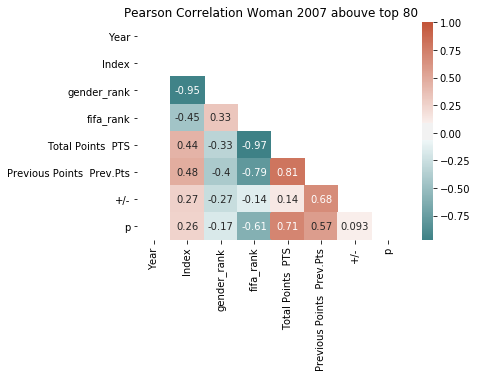

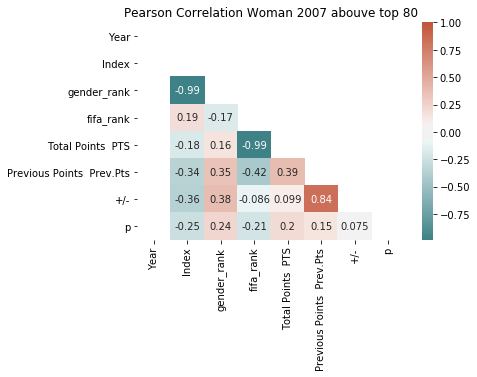

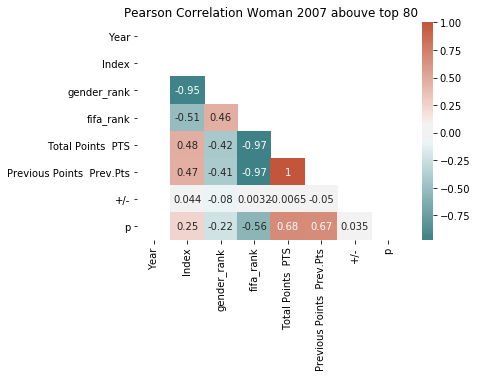

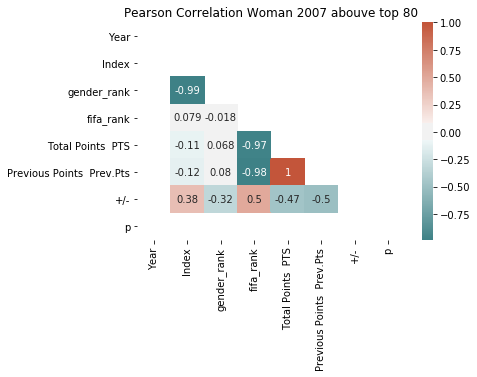

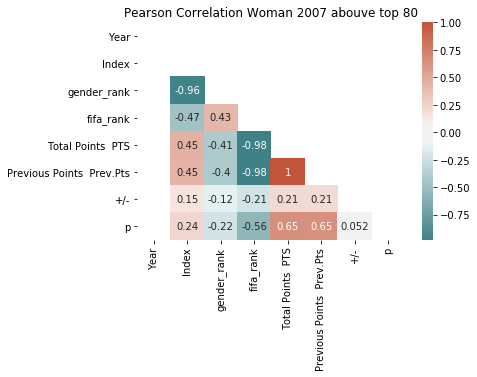

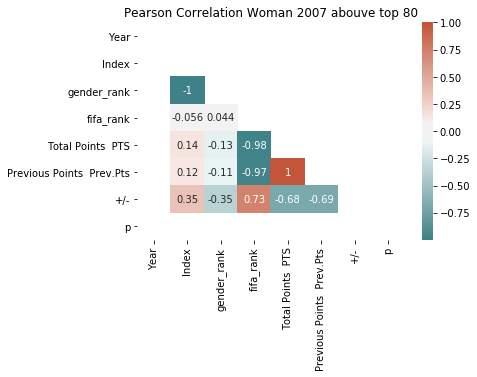

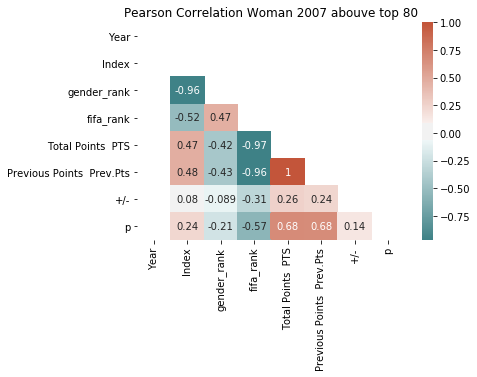

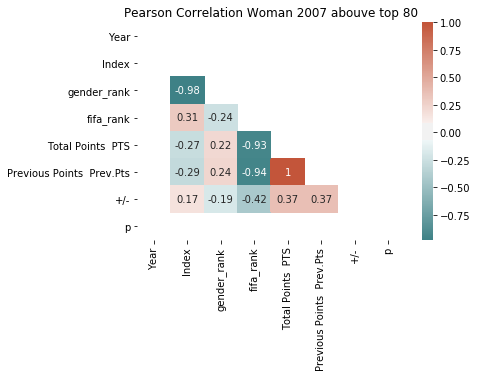

0.30976439334364286

In [313]:
men_top_80_countries = list(set(male[male['fifa_rank']<80]['Country Name_x']))
female_by_men_top_80 = female[female['Country Name_x'].isin(men_top_80_countries)]


correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] < 80],2007, 'Woman 2007 abouve top 80')
correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] >= 80],2007, 'Woman 2007 abouve top 80')

correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] < 80],2008, 'Woman 2007 abouve top 80')
correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] >= 80],2008, 'Woman 2007 abouve top 80')

correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] < 80],2009, 'Woman 2007 abouve top 80')
correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] >= 80],2009, 'Woman 2007 abouve top 80')

correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] < 80],2010, 'Woman 2007 abouve top 80')
correlation_filtered(female_by_men_top_80[female_by_men_top_80['fifa_rank'] >= 80],2010, 'Woman 2007 abouve top 80')

    
    

## Linear regression

Draws the linear regression and returns the r_value

In [73]:
def linear_regression_model(df, year, rank,title):
    new_df = df[(df["Year"] == year) & (df['fifa_rank'] <= rank)].sort_values('fifa_rank')
    
    x = new_df['Index']
    y = new_df['fifa_rank']
    # REGRESSION MODEL
    linear_model = stats.linregress(x,y)
    slope = linear_model[0]
    intercept = linear_model[1]
    regression_line =  slope*x + intercept

    # PLOT
    plt.scatter(x,y)
    ax = plt.gca()
    ax.set_title(title)
    
    ax.set_ylim(ax.get_ylim()[::-1])

    plt.plot(x, regression_line, c = 'orange')
    plt.show()    
    return linear_model.rvalue

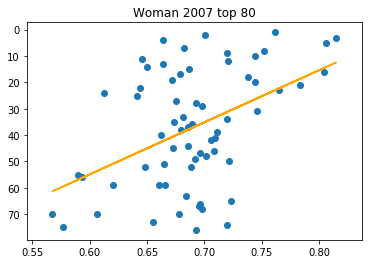

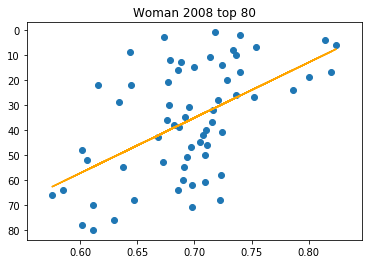

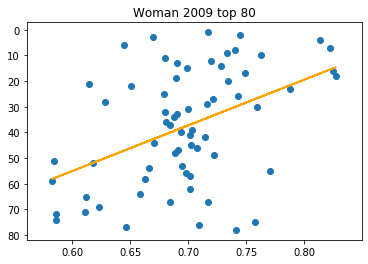

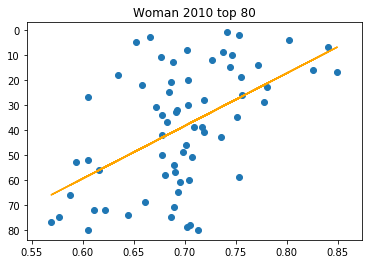

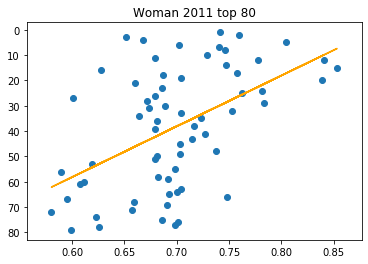

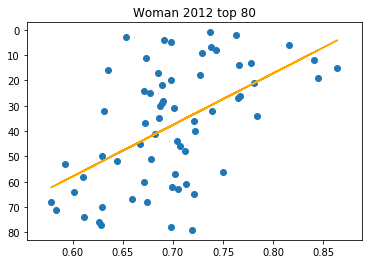

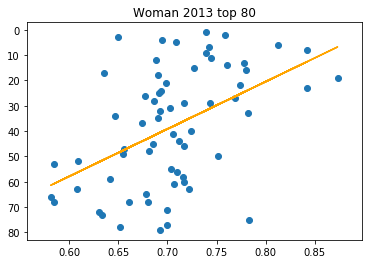

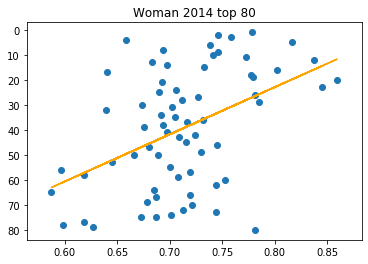

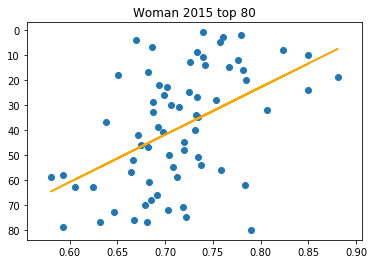

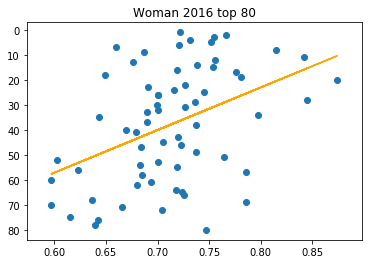

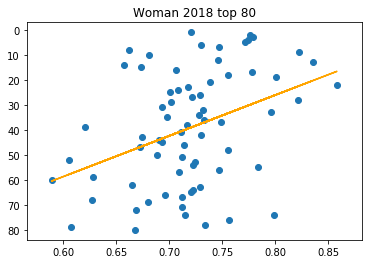

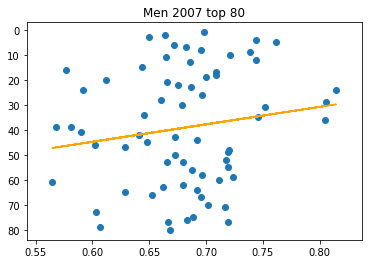

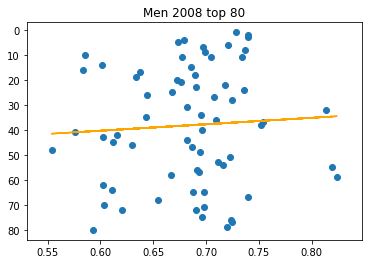

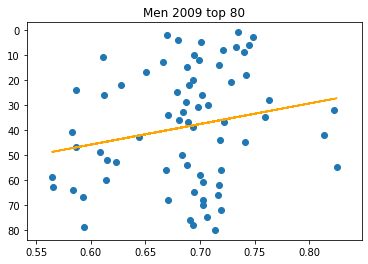

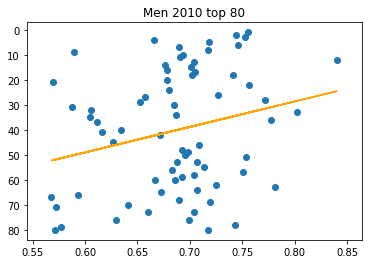

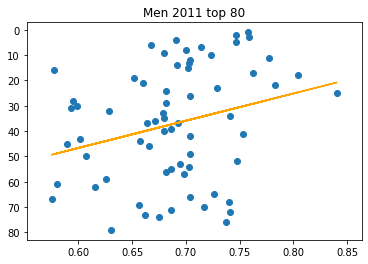

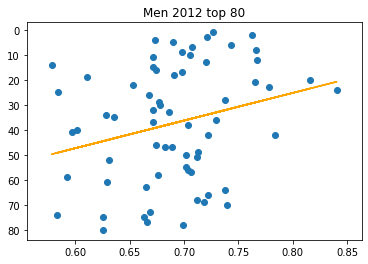

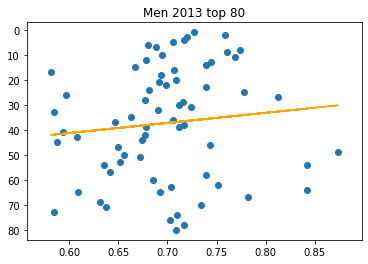

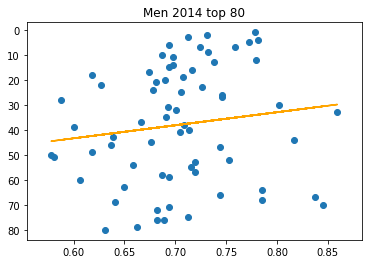

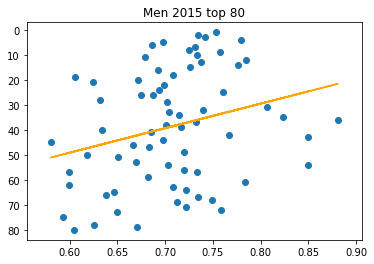

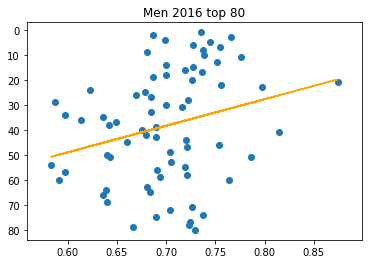

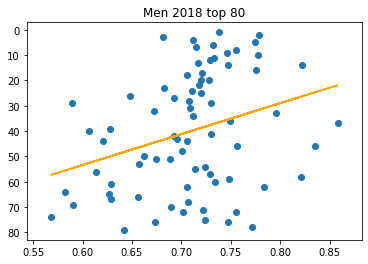

In [74]:
f_80_2007 = linear_regression_model(female,2007,80, 'Woman 2007 top 80')
f_80_2008 = linear_regression_model(female,2008,80, 'Woman 2008 top 80')
f_80_2009 = linear_regression_model(female,2009,80, 'Woman 2009 top 80')
f_80_2010 = linear_regression_model(female,2010,80, 'Woman 2010 top 80')
f_80_2011 = linear_regression_model(female,2011,80, 'Woman 2011 top 80')
f_80_2012 = linear_regression_model(female,2012,80, 'Woman 2012 top 80')
f_80_2013 = linear_regression_model(female,2013,80, 'Woman 2013 top 80')
f_80_2014 = linear_regression_model(female,2014,80, 'Woman 2014 top 80')
f_80_2015 = linear_regression_model(female,2015,80, 'Woman 2015 top 80')
f_80_2016 = linear_regression_model(female,2016,80, 'Woman 2016 top 80')
f_80_2018 = linear_regression_model(female,2018,80, 'Woman 2018 top 80')

m_80_2007 = linear_regression_model(male,2007,80, 'Men 2007 top 80')
m_80_2008 = linear_regression_model(male,2008,80, 'Men 2008 top 80')
m_80_2009 = linear_regression_model(male,2009,80, 'Men 2009 top 80')
m_80_2010 = linear_regression_model(male,2010,80, 'Men 2010 top 80')
m_80_2011 = linear_regression_model(male,2011,80, 'Men 2011 top 80')
m_80_2012 = linear_regression_model(male,2012,80, 'Men 2012 top 80')
m_80_2013 = linear_regression_model(male,2013,80, 'Men 2013 top 80')
m_80_2014 = linear_regression_model(male,2014,80, 'Men 2014 top 80')
m_80_2015 = linear_regression_model(male,2015,80, 'Men 2015 top 80')
m_80_2016 = linear_regression_model(male,2016,80, 'Men 2016 top 80')
m_80_2018 = linear_regression_model(male,2018,80, 'Men 2018 top 80')

In [75]:
data = {
    'Year': list(set(df['Year'])), 
    'Woman rvalue': [f_80_2007,f_80_2008,f_80_2009,f_80_2010,f_80_2011,f_80_2012,f_80_2013,f_80_2014,f_80_2015,f_80_2016,f_80_2018],
    'Men rvalue': [m_80_2007,m_80_2008,m_80_2009,m_80_2010,m_80_2011,m_80_2012,m_80_2013,m_80_2014,m_80_2015,m_80_2016,m_80_2018]
}

pd.DataFrame(data,columns = ['Year','Woman rvalue','Men rvalue']).sort_values('Year')


,Year,Woman rvalue,Men rvalue
2,2007,-0.444570,-0.204978
3,2008,-0.520634,-0.247304
4,2009,-0.505872,-0.268885
5,2010,-0.535747,-0.258073
6,2011,-0.479295,-0.109853
7,2012,-0.451387,-0.137101
8,2013,-0.481590,-0.268473
9,2014,-0.426026,-0.256491
10,2015,-0.379533,-0.309367
0,2016,-0.453616,-0.158928


# R VALUE AND CORRELATION ARE THE SAME THING? 🤯

# HYPOTHESIS TESTING TOP 80
Followed [this tutorial](https://towardsdatascience.com/hypothesis-testing-how-to-determine-significance-ce3991c5db53)

## 1- Experiment design
Before performing the statistical test, we need to consider experiment design. The research question is whether gender gap index has a statistically significant effect on the fifa ranking of a team. That means we need to split the data into two distinct groups in order to test for a difference. These are called the control and experimental groups.
- **Control**: Women below top 80
- **Experimental**: Women top 80

In [114]:
'''QUES- I believe here I should have male vs female instead of high and low fifa rank and then perform an ANOVA test to check the difference between groups'''



'QUES- I believe here I should have male vs female instead of high and low fifa rank and then perform an ANOVA test to check the difference between groups'

In [129]:
control = female[female['fifa_rank']< 81]
control = control['Index']

exp = female[female['fifa_rank']>80]
exp = exp['Index']


exp.mean()

0.6763569832402234

## 2- Checking test assumptions
The following assumptions are required for confidence in the test results:
1. **Normality**

The population data should follow a normal distribution. This can be assessed visually or by performing a normality test, using the super convenient normaltest function (read here for more details).

In [78]:
stats.normaltest(control)
stats.normaltest(exp)

NormaltestResult(statistic=353.50074747665394, pvalue=1.7309639021378137e-77)

The normaltest function combines measures of skew and kurtosis to test for normality. The null hypothesis (which we’ll explain in more detail later on) is that a sample comes from a normal distribution. The function outputs a p-value that is used to make a statistical decision. In this scenario, we interpret the p-values as the null hypothesis is a poor explanation for the observed data and the distribution is non-normal. Don’t worry though!
We can lean on the Central Limit Theorem (CLT) for parameter estimation and hypothesis testing. In a nutshell, the CLT states that provided the sample size n is sufficiently large, then the sampling distribution of the sample mean will be approximately normal regardless of the distribution of the underlying sample. The necessary sample size n depends on the skewness of the distribution, but the general rule of thumb is, n > 30 yields an adequate approximation.

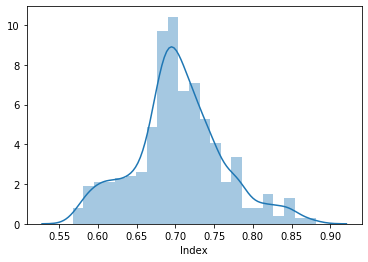

In [79]:
sns.distplot(control);


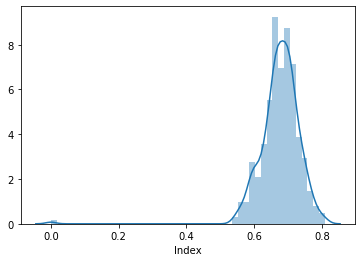

In [80]:
sns.distplot(exp);

2. **Independence**
The next assumption is independence, meaning the quantity of product ordered by one customer does not affect the number of items the next customer orders. This is easily satisfied since we consider each customer’s order individually and independently.

3. **Random**
Finally, samples must be randomly chosen such that every observation has an equal chance of being selected. This is an important consideration when thinking about experiment design because we don’t want to introduce bias in the experiment. To ensure randomness, we will use numpy’s random.choice function to generate a random sample.

## 3- Creating a sampling distribution of the sample mean
The next step is to create a sampling distribution of the sample mean to perform a hypothesis test with. To do this, we will create a function that samples with replacement and calculates the mean of that sample. We will repeat this 1000 times by specifying the distribution size parameter. As previously mentioned, a sufficiently large sample size n will yield an approximately normal distribution, so we will use sample size n = 500 to satisfy the normality assumption.

In [121]:
# create function to sample with replacement
def get_sample(df, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(df)
        sample.append(x)
    return sample

# create function to calculate mean of the sample
def get_sample_mean(sample):
    return sum(sample)/len(sample)
# combine functions to create a sample distribution
# create a distribution size of 1000 and sample size of 500

def create_sample_distribution(df, dist_size=1000, n=500):
    sample_dist = [] 
    while len(sample_dist) != dist_size:
        sample = get_sample(df, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
        
    return sample_dist

# create sample distributions of sample mean for control and target
ctrl_sample = create_sample_distribution(control)
exp_sample = create_sample_distribution(exp)

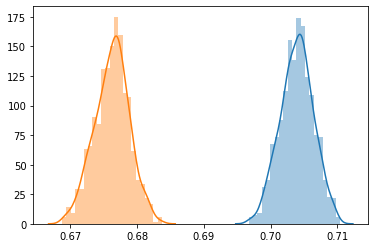

In [125]:
sns.distplot(ctrl_sample);
sns.distplot(exp_sample);

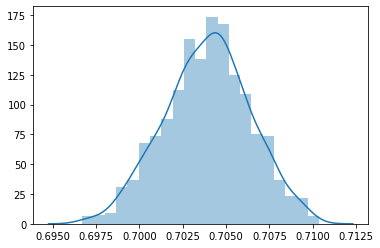

In [126]:
sns.distplot(ctrl_sample);


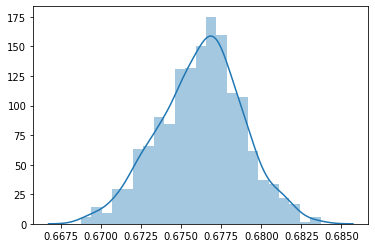

In [124]:
sns.distplot(exp_sample);

## 4- Two sample t-test
Since the measurements are from two distinct groups (control and experimental), we will compare two independent means by performing a two-sample t-test. To begin testing, two competing hypotheses are set up. The null hypothesis, Hₒ, is a statement about a parameter value that we assume to be true until proven otherwise. The alternative hypothesis, Hₐ, is a statement of a range of alternative values that the parameter may fall in. The specific type of test we are performing is referred to as a right-tailed test because we are claiming the parameter to be greater than a certain value.

#### Hypotheses
- Hₒ: There is no difference in the mean quantity of product ordered when comparing customers who did not receive a discount with customers who received a discount
- Hₐ: The mean quantity of product ordered by customers who received a discount should be greater than 21.7, the mean quantity of product ordered by customers without a discount

#### Significance level and power
Next, set a level of significance called alpha (α) to make a statistical decision about the null hypothesis. This value represents the probability of incorrectly rejecting Hₒ when it is true. Alpha is also known as the probability of committing a Type I error. In general, the most common α value is 0.05 simply due to a historical convention. In 1925, R.A. Fisher proposed 0.05 as the limit for statistical significance and to this day, it remains the most popular probability cutoff value. However, α can be set to a level you are most comfortable with, which will likely depend on the nature of the research question. The other type of error encountered is a Type II error where Hₒ is accepted when it is false. This probability is represented by the β value.

In general, set up the hypotheses such that Type I is the more serious error. The reason why is because we want to present evidence against the null hypothesis, so we want to minimize α.
Type I error: accept ‘discount amount has an effect’ when it does not (i.e. keep offering discounts when it has no effect, resulting in lower revenue)
Type II error: reject ‘discount amount has an effect’ when it does have an effect (i.e. offer no discounts when it actually has an effect on the quantity of product ordered, resulting in failure to capture potential additional revenue)
Notice how the Type I error is considered to be the more egregious offense because the company is losing money by doing something that has no value.
All of this is directly tied to the concept of statistical power. Statistical power is the probability of correctly rejecting a false null hypothesis and calculated by: 1- β. Notice how there is an inverse relationship between α and β. Decreasing α increases β and vice versa. To decrease both probabilities, one has to increase the sample size, hence choosing sample size n = 500. Recognizing these errors early on is an essential aspect of experiment design so we can identify any potential pitfalls.

#### p-value
The last idea to cover before we perform the test is the p-value. The p-value is the probability, assuming the null hypothesis is true, of observing a result equal to or more extreme than what was actually observed. In other words, if p < α, this suggests the data is inconsistent with the null hypothesis and it may be rejected.

#### Welch’s t-test
There are two choices when performing a two-sample t-test: the Student’s t-test, and Welch’s t-test. The difference is that the former assumes equal population variance while the latter does not. Welch’s t-test is considered to be more reliable when the samples have unequal variances. Given the unequal variances, we will use Welch’s t-test by running the ttest_ind function.

In [83]:
# Test whether variances are equal
np.var(control) == np.var(exp)

False

In [84]:
# set equal_var to false to perform welch's t-test
stats.ttest_ind(exp_sample,ctrl_sample, equal_var= False)

Ttest_indResult(statistic=-233.53428424341635, pvalue=0.0)

We get a test statistic of 136 and p-value of 0. The test outputs a two-tailed p-value, so divide by two to obtain the one-tail p-value. In this case, the p-value is still 0. Since p < α (0.05), we reject the null hypothesis. There is statistical evidence at the 5% level of significance to conclude that the mean quantity of product ordered by customers who received a discount is greater than 21.7, the mean quantity of product ordered by customers in the control group.

## 5- Effect size
While we may claim a statistical difference exists, we also need to measure the magnitude of the difference. This is known as the effect size which is immune to sample size, unlike the p-value. Thus it is important to calculate effect size because if the sample size is very large we may obtain significant results where there really should not be one. Effect size is commonly measured using Cohen’s d, where values of 0 - 0.2 have little or no effect and values > 0.8 have a large effect size.



In [90]:
# Cohen's d=mean1(sample) −mean2(population)/standard deviation(sample)

# QUES- WHAAAT?

Now we can claim that **discount amount has a large statistically significant effect on quantity of product ordered.**

## 6- One-way ANOVA
We know discount amount has an effect, but at what levels of discount amount do we observe a statistically significant effect? Does a 5% discount have the same effect as a 20% discount? This can be answered by performing a one-way ANOVA, which tests for significant differences between multiple groups.


In [92]:
aov_table = sm.stats.anova_lm(results, typ=2)

NameError: name 'sm' is not defined